In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_ta as ta

#print(os.getcwd())
#df = pd.read_csv('demo/tutorial.csv', delimiter=';')
df_1 = pd.read_csv('training/prices_round_3_day_0.csv', delimiter=';')
df_2 = pd.read_csv('training/prices_round_3_day_1.csv', delimiter=';')
df_3 = pd.read_csv('training/prices_round_3_day_2.csv', delimiter=';')

# Append DF
df = df_1.append(df_2).append(df_3)
df.reset_index(drop=True, inplace=True)

#df['median_price'] = df.apply(lambda row: np.median([i for i in [row['bid_price_1'], row['bid_price_2'], row['bid_price_3'], row['ask_price_1'], row['ask_price_2'], row['ask_price_3']] if i > 0.0]), axis=1)


df


C:\Users\yinki\AppData\Local\Temp\ipykernel_948\1549476950.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2).append(df_3)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
119996,2,999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,2,999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
119998,2,999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [4]:

for dfs in [df_1, df_2, df_3]:
    threshold_sunlight = 2500

    counter = 0
    counter_beneath_threshold = 0
    start_counter = 0

    def check_if_sunlight_is_beneath_threshold(sunlight):
        global counter
        global counter_beneath_threshold
        global start_counter
        counter += 1
        
        if sunlight < threshold_sunlight:
            counter_beneath_threshold += 1
        
        if counter_beneath_threshold > int((17/24) * 10000):
            start_counter += 1
            return start_counter / 70
        
        return 0


    dfs['TOTAL_TARIFF'] = dfs['IMPORT_TARIFF'] + dfs['EXPORT_TARIFF'] + dfs['TRANSPORT_FEES']
    dfs['Ideal Humidity'] = dfs['HUMIDITY'].apply(lambda x: 1 if x <= 80 and x >= 60 else 0)
    dfs['Humidity Away from Ideal'] = dfs['HUMIDITY'].apply(lambda x: (60 - x) // 5  if x < 60 else (x - 80) // 5 if x > 80 else 0)
    dfs['ORCHID_CHANGE'] = dfs['ORCHIDS'].shift(-1) - dfs['ORCHIDS']
    dfs['LOG_ORCHID_CHANGE'] = np.log(dfs['ORCHID_CHANGE'] + 1)
    dfs['TARIFF_CHANGE'] = dfs['TOTAL_TARIFF'].shift(-1) - dfs['TOTAL_TARIFF']
    dfs['SUNLIGHT_HUMIDITY'] = dfs['SUNLIGHT'] * dfs['HUMIDITY']
    dfs['SUNLIGHT_HUMIDITY_IDEAL'] = dfs['SUNLIGHT'] * dfs['HUMIDITY'] * dfs['Ideal Humidity']
    dfs['EXPOSED SUNLIGHT'] = dfs['SUNLIGHT'].apply(check_if_sunlight_is_beneath_threshold)
    dfs['SUNLIGHT_HUMIDITY_RATIO'] = dfs['SUNLIGHT'] / dfs['HUMIDITY'] 

    # Making Lags 1, 2, 3
    dfs['ORCHID_LAG'] = dfs['ORCHIDS'].shift(1)
    dfs['TOTAL_TARIFF_LAG'] = dfs['TOTAL_TARIFF'].shift(1)
    dfs['Ideal Humidity Lag'] = dfs['Ideal Humidity'].shift(1)
    dfs['Humidity Away from Ideal Lag'] = dfs['Humidity Away from Ideal'].shift(1) 
    dfs['SUNLIGHT_LAG'] = dfs['SUNLIGHT'].shift(1)
    dfs['EXPOSED SUNLIGHT LAG'] = dfs['EXPOSED SUNLIGHT'].shift(1)
    dfs['ORCHID_CHANGE_LAG'] = dfs['ORCHID_CHANGE'].shift(1)
    dfs['TARIFF_CHANGE_LAG'] = dfs['TARIFF_CHANGE'].shift(1)
    dfs['SUNLIGHT_HUMIDITY_LAG'] = dfs['SUNLIGHT_HUMIDITY'].shift(1)
    dfs['SUNLIGHT_HUMIDITY_IDEAL_LAG'] = dfs['SUNLIGHT_HUMIDITY_IDEAL'].shift(1)
    dfs['SUNLIGHT_HUMIDITY_RATIO_LAG'] = dfs['SUNLIGHT_HUMIDITY_RATIO'].shift(1)
    dfs['LOG_ORCHID_CHANGE_LAG'] = dfs['LOG_ORCHID_CHANGE'].shift(1)
    
    dfs['ORCHID_LAG_2'] = dfs['ORCHIDS'].shift(2)
    dfs['TOTAL_TARIFF_LAG_2'] = dfs['TOTAL_TARIFF'].shift(2)
    dfs['Ideal Humidity Lag_2'] = dfs['Ideal Humidity'].shift(2)
    dfs['Humidity Away from Ideal Lag_2'] = dfs['Humidity Away from Ideal'].shift(2) 
    dfs['SUNLIGHT_LAG_2'] = dfs['SUNLIGHT'].shift(2)
    dfs['EXPOSED SUNLIGHT LAG_2'] = dfs['EXPOSED SUNLIGHT'].shift(2)
    dfs['ORCHID_CHANGE_LAG_2'] = dfs['ORCHID_CHANGE'].shift(2)
    dfs['TARIFF_CHANGE_LAG_2'] = dfs['TARIFF_CHANGE'].shift(2)
    dfs['SUNLIGHT_HUMIDITY_LAG'] = dfs['SUNLIGHT_HUMIDITY'].shift(2)
    dfs['SUNLIGHT_HUMIDITY_IDEAL_LAG'] = dfs['SUNLIGHT_HUMIDITY_IDEAL'].shift(2)
    dfs['SUNLIGHT_HUMIDITY_RATIO_LAG'] = dfs['SUNLIGHT_HUMIDITY_RATIO'].shift(2)
    dfs['LOG_ORCHID_CHANGE_LAG'] = dfs['LOG_ORCHID_CHANGE'].shift(2)
    
    
    
    dfs['ORCHID_LAG_3'] = dfs['ORCHIDS'].shift(3)
    dfs['TOTAL_TARIFF_LAG_3'] = dfs['TOTAL_TARIFF'].shift(3)
    dfs['Ideal Humidity Lag_3'] = dfs['Ideal Humidity'].shift(3)
    dfs['Humidity Away from Ideal Lag_3'] = dfs['Humidity Away from Ideal'].shift(3) 
    dfs['SUNLIGHT_LAG_3'] = dfs['SUNLIGHT'].shift(3)
    dfs['EXPOSED SUNLIGHT LAG_3'] = dfs['EXPOSED SUNLIGHT'].shift(3)
    dfs['ORCHID_CHANGE_LAG_3'] = dfs['ORCHID_CHANGE'].shift(3)
    dfs['TARIFF_CHANGE_LAG_3'] = dfs['TARIFF_CHANGE'].shift(3)
    dfs['SUNLIGHT_HUMIDITY_LAG'] = dfs['SUNLIGHT_HUMIDITY'].shift(3)
    dfs['SUNLIGHT_HUMIDITY_IDEAL_LAG'] = dfs['SUNLIGHT_HUMIDITY_IDEAL'].shift(3)
    dfs['SUNLIGHT_HUMIDITY_RATIO_LAG'] = dfs['SUNLIGHT_HUMIDITY_RATIO'].shift(3)
    dfs['LOG_ORCHID_CHANGE_LAG'] = dfs['LOG_ORCHID_CHANGE'].shift(3)




    
    dfs.dropna(inplace=True)
    dfs.replace(-np.inf, -2, inplace=True)
    dfs
    dfs.corr()
    


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid 

In [5]:
df_1.corr()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,TOTAL_TARIFF,Ideal Humidity,...,ORCHID_CHANGE_LAG_2,TARIFF_CHANGE_LAG_2,ORCHID_LAG_3,TOTAL_TARIFF_LAG_3,Ideal Humidity Lag_3,Humidity Away from Ideal Lag_3,SUNLIGHT_LAG_3,EXPOSED SUNLIGHT LAG_3,ORCHID_CHANGE_LAG_3,TARIFF_CHANGE_LAG_3
timestamp,1.000000,-0.054283,-0.120851,0.022728,-0.479517,0.317868,-0.374514,NaN,-0.088102,0.137462,...,0.004960,-0.005984,-0.054135,-0.087562,0.136318,-0.393826,0.318388,NaN,-0.006049,0.000731
ORCHIDS,-0.054283,1.000000,0.106787,0.181696,-0.132727,0.630117,0.657814,NaN,0.164435,-0.557099,...,0.032465,-0.013019,0.997392,0.165873,-0.557070,0.493380,0.630844,NaN,0.019945,-0.006386
TRANSPORT_FEES,-0.120851,0.106787,1.000000,0.152317,-0.090777,-0.086017,0.074305,NaN,0.265350,-0.065188,...,0.009075,-0.021486,0.105991,0.268856,-0.064029,0.018141,-0.087200,NaN,0.010358,-0.022447
EXPORT_TARIFF,0.022728,0.181696,0.152317,1.000000,-0.076332,0.348165,0.258935,NaN,0.973783,0.074810,...,0.017041,0.034794,0.179873,0.969400,0.074897,0.363932,0.346815,NaN,0.018349,0.034027
IMPORT_TARIFF,-0.479517,-0.132727,-0.090777,-0.076332,1.000000,-0.403500,-0.094813,NaN,0.109224,0.155435,...,-0.003970,-0.005143,-0.132828,0.109448,0.156146,-0.014924,-0.402475,NaN,-0.002755,-0.006697
SUNLIGHT,0.317868,0.630117,-0.086017,0.348165,-0.403500,1.000000,0.680438,NaN,0.246515,-0.432809,...,0.009835,-0.012691,0.629547,0.248116,-0.434525,0.611759,0.999989,NaN,0.002893,-0.007452
HUMIDITY,-0.374514,0.657814,0.074305,0.258935,-0.094813,0.680438,1.000000,NaN,0.242209,-0.671312,...,0.005001,-0.003268,0.657356,0.242751,-0.671464,0.885414,0.679684,NaN,0.007549,-0.006259
DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTAL_TARIFF,-0.088102,0.164435,0.265350,0.973783,0.109224,0.246515,0.242209,NaN,1.000000,0.093953,...,0.016952,0.029762,0.162543,0.996276,0.094334,0.351845,0.245247,NaN,0.018629,0.028586
Ideal Humidity,0.137462,-0.557099,-0.065188,0.074810,0.155435,-0.432809,-0.671312,NaN,0.093953,1.000000,...,0.000714,0.005134,-0.557503,0.093304,0.996255,-0.381810,-0.431848,NaN,0.000311,-0.001274


In [16]:
# MultiVariate Linear Regression
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LassoCV


CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

train_df1, train_df2, train_df3 = df_1.copy(), df_2.copy(), df_3.copy()

results = {
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}

coefficients_res = []
intercepts_res = []
for dfs in [train_df1, train_df2, train_df3]:
    #X_variables = [i for i in dfs.columns if i not in ['ORCHIDS', 'timestamp', 'ORCHID_CHANGE','LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 	'EXPORT_TARIFF'	, 'IMPORT_TARIFF', 'DAY']]
    X_variables = ['Ideal Humidity Lag', 'Humidity Away from Ideal Lag']
    
    # Do ElasticNet Regression
    X = dfs[X_variables]
    y = np.sqrt(dfs['ORCHID_CHANGE'])


    # 3. Train-Test Split split 70 30
    X_train, X_test, y_train, y_test = X[:int(0.7*len(X))], X[int(0.7*len(X)):], y[:int(0.7*len(y))], y[int(0.7*len(y)):]

    # 4. Model Training
    model = OLS(y_train, X_train, hasconst=False).fit()
    print(model.summary())
    
    model = LassoCV(cv=5, selection='random', fit_intercept=False, random_state=42, max_iter=10000, n_alphas=100, tol=0.0001, n_jobs=-1, verbose=1, alphas=np.linspace(0.0001, 0.1, 100))
    model.fit(X_train, y_train)
    
    print("Best Alpha:", model.alpha_)
    print(f"Selected {np.sum(model.coef_ != 0)} features from {len(model.coef_)}")
    selected_features = X_train.columns[model.coef_ != 0]
    print("Selected Features:", selected_features)


    # 5. Model Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    print("R-Squared:", model.score(X_test, y_test))


    # 6. Interpret Results
    coefficients = model.coef_
    intercept = model.intercept_
    print("Coefficients:", coefficients)
    print("Intercept:", intercept)
    
    
    # Add to results
    coefficients_res += [coefficients]
    intercepts_res += [intercept]


    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_pred.shape)
    y_pred = pd.Series(y_pred, index=y_test.index)

    # Plotting the actual and predicted values against timestamps using the same index
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, color='blue', label='Actual Total Tariff', marker='o')
    plt.plot(y_pred.index, y_pred, color='red', label='Predicted Total Tariff', marker='x')

    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    # Print Train
    y_train_pred = pd.Series(model.predict(X_train), index=y_train.index)

    train_mse = mean_squared_error(y_train, y_train_pred)
    print("Train Mean Squared Error:", train_mse)
    plt.figure(figsize=(10, 6))
    plt.plot(y_train.index, y_train.values, color='blue', label='Actual Total Orchids Train', marker='o')
    plt.plot(y_train_pred.index, y_train_pred, color='red', label='Predicted Total Orchids Train', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Merge into combined dataframe
new_df = pd.concat([y_test, pd.Series(y_pred)], axis=1)
new_df


coefficients_res = np.array(coefficients_res)
intercepts_res = np.array(intercepts_res)

coefficients_res.mean(axis=0), intercepts_res.mean()



C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


                                 OLS Regression Results                                
Dep. Variable:          ORCHID_CHANGE   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                         nan
Time:                        13:25:10   Log-Likelihood:                             nan
No. Observations:                5575   AIC:                                        nan
Df Residuals:                    5573   BIC:                                        nan
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

ValueError: Input y contains NaN.

Mean Squared Error: 3.855806020114249e-24
Train Mean Squared Error: 2.8364103689688106e-24


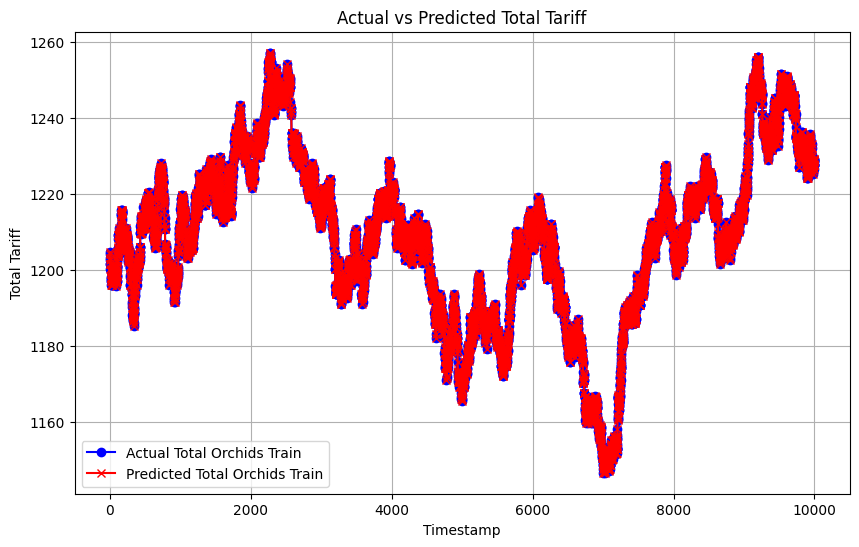

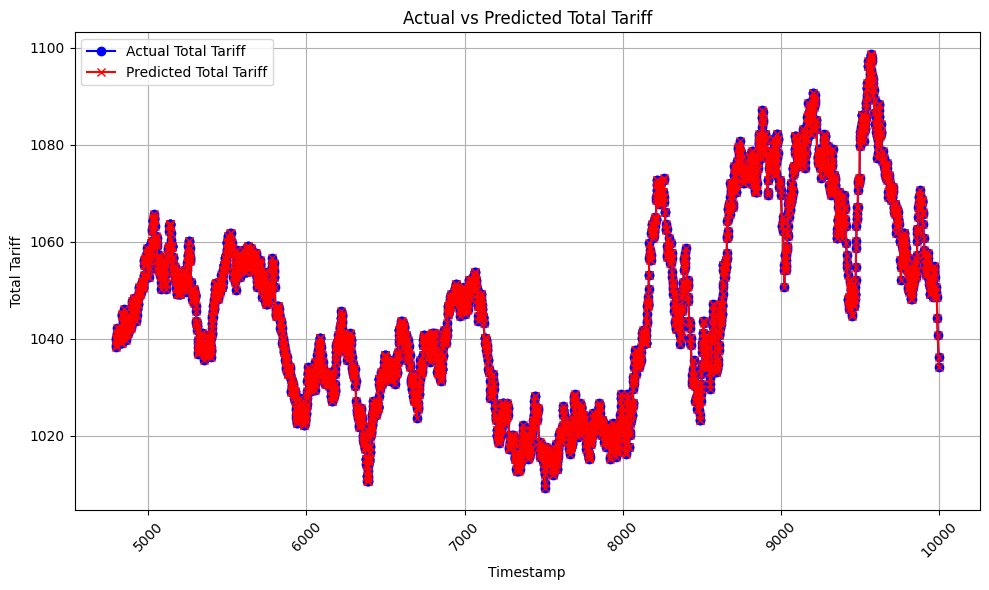

Mean Squared Error: 4.690536362532581e-26
Train Mean Squared Error: 6.619077459299934e-25


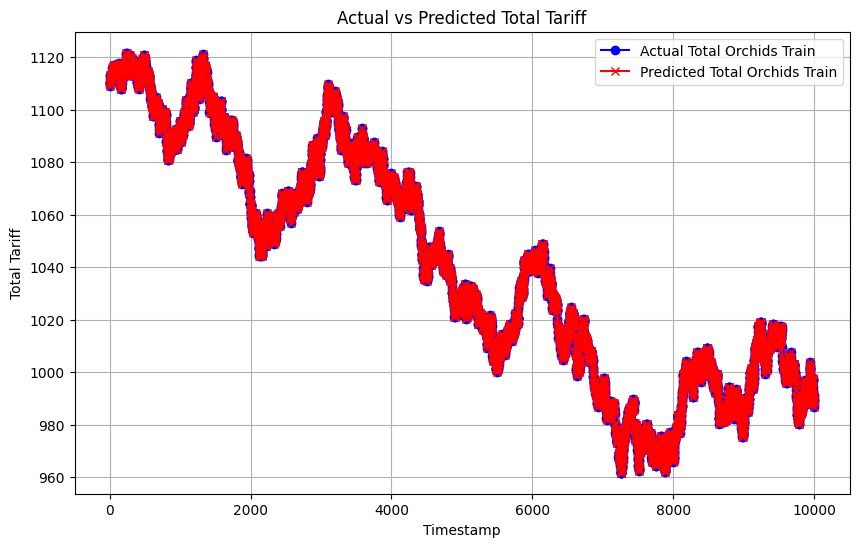

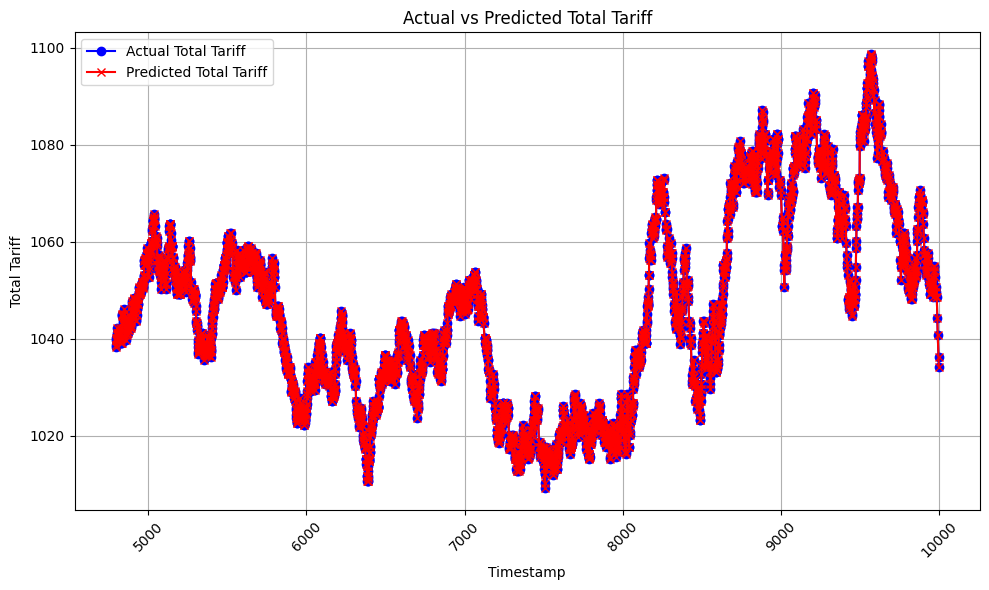

Mean Squared Error: 2.0591423661796614e-26
Train Mean Squared Error: 4.963414019013275e-26


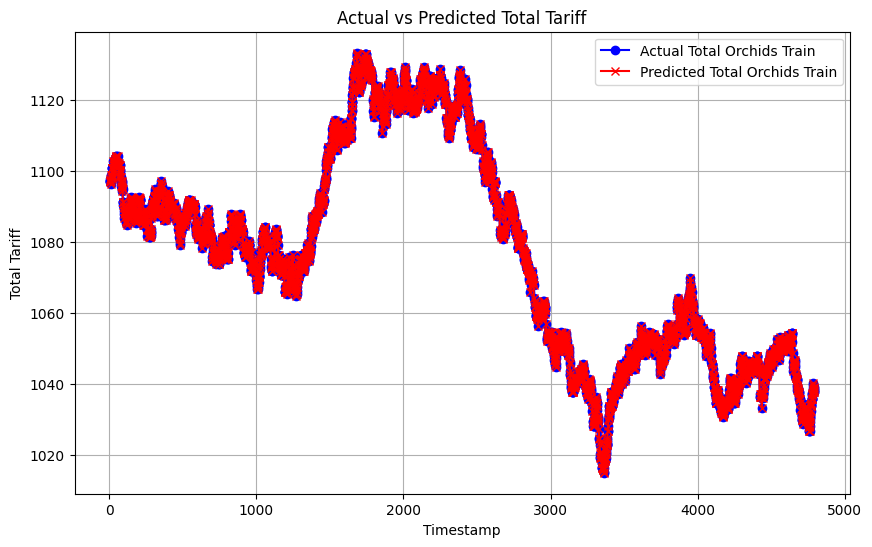

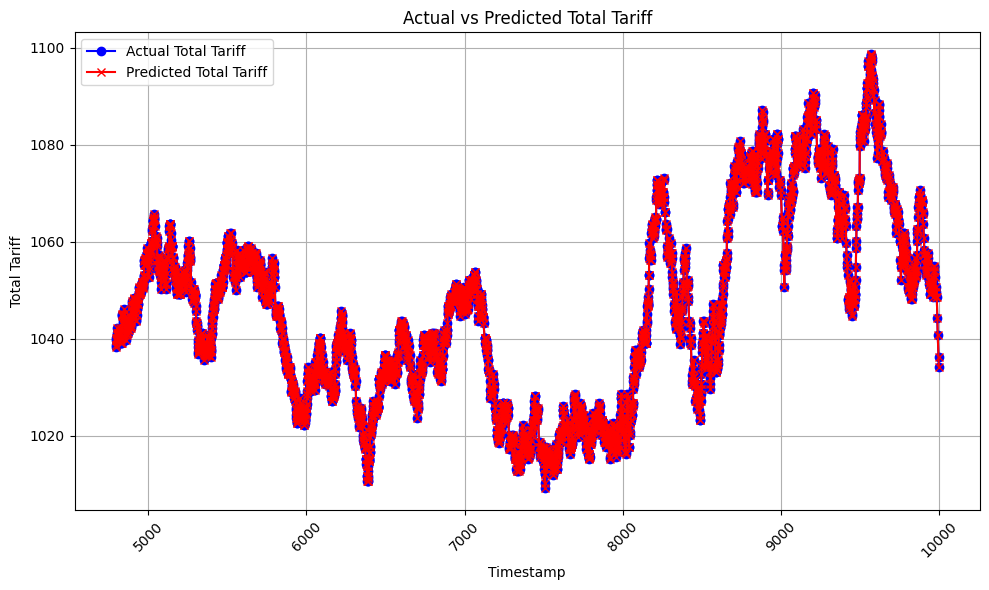

Coefficients: [-8.10874811e-13 -5.91120577e-15  4.31060886e-15 -9.60727505e-14
 -1.08227191e-14  1.46364645e-14  1.12295342e-15  3.27764434e-17
  2.22044605e-16  5.57498619e-12  2.98537860e-15 -1.22666898e-14
  3.87632699e-15  1.82030443e-12  2.77555756e-17  1.00000000e+00
  1.13485257e-14 -1.12052958e-15 -3.15193751e-17 -5.57302709e-12
 -7.88986724e-16  6.66666667e-01 -5.83203802e-16 -3.38198806e-15
  1.71391269e-16 -1.65502451e-12  0.00000000e+00  1.00000000e+00
  3.56051434e-15  3.33333333e-01  7.98068655e-15 -8.61946915e-16
  3.27485607e-16  6.45316084e-13  0.00000000e+00  3.33333333e-01
 -8.56234694e-15]
Intercept: -4.547473508864641e-13
Model Score: 1.0


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Initialize an empty model
model = LinearRegression(fit_intercept=True)

# Define your training dataframes
train_df1, train_df2, train_df3, test = df_1.copy(), df_2.copy(), df_3.copy()[:int(len(df_3)/2)],  df_3.copy()[int(len(df_3)/2):]

X_test = test[[i for i in train_df3.columns if i not in ['ORCHID_LAG', 'ORCHIDS', 'timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]]
y_test = test['ORCHIDS']

# Define function to iteratively train and update the model
def train_iteratively(model, X_train, y_train, X_test, y_test):
    # Train the model with the current training set
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    
    # Plot the training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    print("Train Mean Squared Error:", train_mse)
    plt.figure(figsize=(10, 6))
    plt.plot(y_train.index, y_train.values, color='blue', label='Actual Total Orchids Train', marker='o')
    plt.plot(y_train.index, y_train_pred, color='red', label='Predicted Total Orchids Train', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    

    # Plotting the actual and predicted values against timestamps using the same index
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, color='blue', label='Actual Total Tariff', marker='o')
    plt.plot(y_test.index, y_pred, color='red', label='Predicted Total Tariff', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model

# Iteratively train and update the model using each training set
model = train_iteratively(model, train_df1[[i for i in train_df3.columns if i not in ['ORCHIDS', 'ORCHID_LAG', 'timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]], train_df1['ORCHIDS'], X_test, y_test)
model = train_iteratively(model, train_df2[[i for i in train_df3.columns if i not in ['ORCHIDS', 'ORCHID_LAG','timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]], train_df2['ORCHIDS'], X_test, y_test)
model = train_iteratively(model, train_df3[[i for i in train_df3.columns if i not in ['ORCHIDS', 'ORCHID_LAG','timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]], train_df3['ORCHIDS'], X_test, y_test)


# Print the coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Model Score:", model.score(X_test, y_test))


In [8]:
starfruit_df = df[df['product'] == 'STARFRUIT']
starfruit_df['MACD'] = starfruit_df['mid_price'].ewm(span=12, adjust=False).mean() - starfruit_df['mid_price'].ewm(span=26, adjust=False).mean()
starfruit_df['signal'] = starfruit_df['MACD'].ewm(span=9, adjust=False).mean()
starfruit_df['RSI(14)'] = ta.rsi(starfruit_df['mid_price'], length=14)
starfruit_df['RSI(7)'] = ta.rsi(starfruit_df['mid_price'], length=7)

# Create figure and axes for the two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15, 20))

# Plot mid price on the first subplot
ax1.plot(starfruit_df.index, starfruit_df['mid_price'], color='green')
ax1.set_ylabel('Mid Price')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax2.plot(starfruit_df.index, starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'], color='blue')
ax2.set_ylabel('Bid-Ask Volume Difference')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax3.plot(starfruit_df.index, starfruit_df['total_bid_volume'], color='red')

ax4.plot(starfruit_df.index, starfruit_df['total_ask_volume'], color='black')

# Show the plot
plt.show()

# Calculate SMAs
sma_3 = starfruit_df['mid_price'].rolling(window=3).mean()
sma_5 = starfruit_df['mid_price'].rolling(window=5).mean()
sma_10 = starfruit_df['mid_price'].rolling(window=10).mean()

# Plotting
fig, ax = plt.subplots(figsize=(30, 20))
plt.plot(starfruit_df['mid_price'], label='mid_price')

# Plot SMAs
plt.plot(sma_3, label='SMA 3', linestyle='--')
plt.plot(sma_5, label='SMA 5', linestyle='--')
plt.plot(sma_10, label='SMA 10', linestyle='--')

plt.legend()
plt.show()

print(starfruit_df['mid_price'].std())


period1 = starfruit_df.iloc[:100]
period1_SMA3 = period1['mid_price'].rolling(window=3).mean()
period1_SMA5 = period1['mid_price'].rolling(window=5).mean()
period1_SMA10 = period1['mid_price'].rolling(window=10).mean()
# Print MACD and signal with the mid_price above
# Create two subplots, one for mid_price and one for MACD and signal
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 20), sharex=True)

# Plot mid_price on the first subplot
ax1.plot(period1.index, period1['mid_price'], label='mid_price', color='blue')
ax1.plot(period1.index, period1_SMA3, label='SMA 3', linestyle='--')
ax1.plot(period1.index, period1_SMA5, label='SMA 5', linestyle='--')
ax1.plot(period1.index, period1_SMA10, label='SMA 10', linestyle='--')
ax1.legend()

# Plot MACD on the second subplot
ax2.plot(period1.index, period1['MACD'], label='MACD', color='orange')
ax2.legend()

# Plot signal on the second subplot
ax2.plot(period1.index, period1['signal'], label='signal', color='green')
ax2.legend()


ax3.plot(period1.index, period1['RSI(7)'], label='RSI(7)', color='red')
ax3.legend()
plt.show()


# Calculate daily returns
daily_returns = starfruit_df['mid_price'].pct_change()

# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = daily_returns.std()

# Calculate the mean of daily volatility
mean_daily_volatility = np.mean(daily_volatility)

print("Mean of daily volatility:", mean_daily_volatility)


KeyError: 'product'

In [ ]:
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,vwap,best_bid,best_ask,mid_price_best,median_price,spread,MACD,signal,RSI(14),RSI(7)
1,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,5000.000000,4997.0,5003.0,5000.0,5000.0,6.000000,0.000000,0.000000,NaN,NaN
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,5000.156863,4997.0,5004.0,5000.5,4999.0,6.322581,0.159544,0.031909,NaN,NaN
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,4999.516129,4996.0,5003.0,4999.5,4997.0,6.967742,0.123181,0.050163,NaN,NaN
7,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,4999.500000,4996.0,5003.0,4999.5,4999.5,7.000000,0.053401,0.050811,NaN,NaN
9,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,4998.500000,4995.0,5002.0,4998.5,4998.5,7.000000,-0.081650,0.024319,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,5052.500000,5049.0,5056.0,5052.5,5052.5,7.000000,-0.446447,-0.491025,48.529281,51.834261
59992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,5050.261538,5047.0,5054.0,5050.5,5048.0,6.750000,-0.518817,-0.496583,42.312390,38.011770
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,5051.490566,5048.0,5055.0,5051.5,5053.5,6.737892,-0.370175,-0.471302,53.096980,59.178504
59996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,5050.527273,5047.0,5054.0,5050.5,5052.0,6.928571,-0.568587,-0.490759,40.160303,36.141773


In [ ]:
amethysts_df = df[df['product'] == 'AMETHYSTS']
amethysts_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,vwap,best_bid,best_ask,mid_price_best,median_price,spread
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,0.0,0.0,10004,...,9995.038462,10004.961538,26.0,26.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.923077
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,0.0,0.0,10005,...,9996.000000,10005.000000,25.0,20.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.000000
5,-2,200,AMETHYSTS,9996,1,9995.0,30.0,0.0,0.0,10004,...,9995.032258,10004.967742,31.0,31.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.935484
6,-2,300,AMETHYSTS,9996,1,9995.0,26.0,0.0,0.0,10004,...,9995.037037,10004.962963,27.0,27.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.925926
8,-2,400,AMETHYSTS,9995,20,0.0,0.0,0.0,0.0,9998,...,9995.000000,10003.500000,20.0,32.0,10000.230769,9995.0,10005.0,10000.0,10000.0,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,0,999500,AMETHYSTS,9995,28,0.0,0.0,0.0,0.0,10002,...,9995.000000,10004.470588,28.0,34.0,10000.193548,9995.0,10005.0,10000.0,10002.0,9.470588
59993,0,999600,AMETHYSTS,9996,2,9995.0,27.0,0.0,0.0,10002,...,9995.068966,10004.656250,29.0,32.0,10000.098361,9995.0,10005.0,10000.0,10002.0,9.587284
59994,0,999700,AMETHYSTS,9996,2,9995.0,24.0,0.0,0.0,10004,...,9995.076923,10004.923077,26.0,26.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.846154
59997,0,999800,AMETHYSTS,9995,27,0.0,0.0,0.0,0.0,10005,...,9995.000000,10005.000000,27.0,27.0,10000.000000,9995.0,10005.0,10000.0,10000.0,10.000000


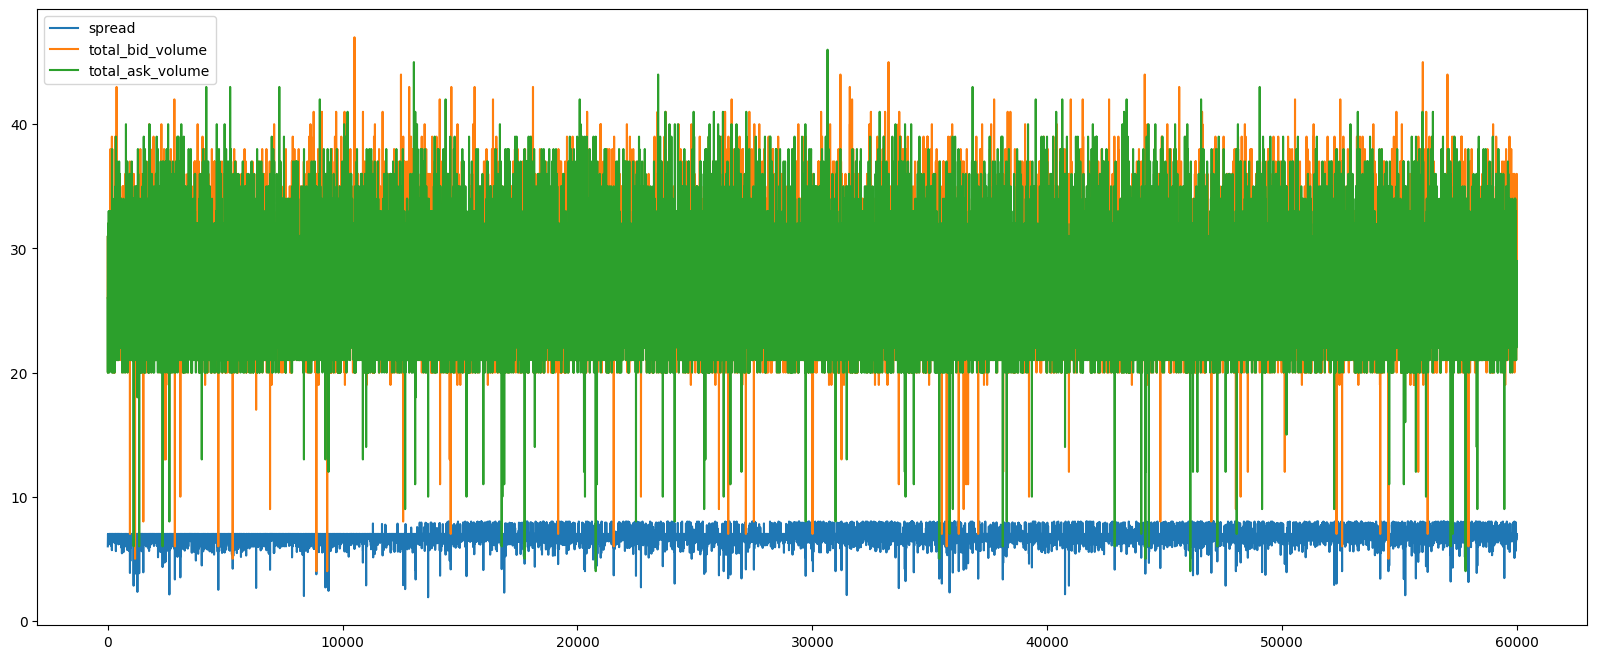

Average Spread: 6.862003774087599
Standard Deviation Spread: 0.3838702273417948


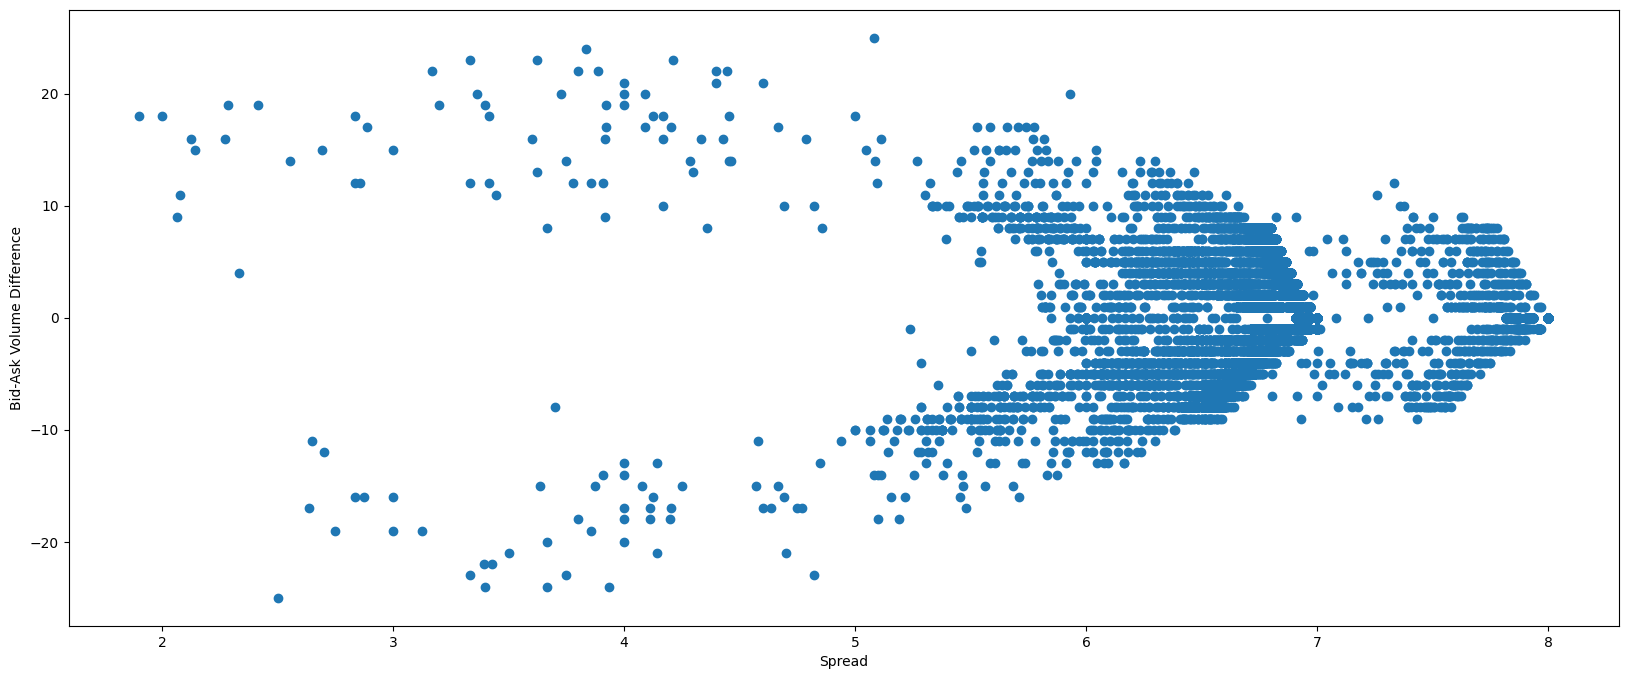

In [ ]:
# Descriptive Statistics , finding mid_price, spread and volume 

# Plot spread and volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(starfruit_df['spread'], label='spread')
plt.plot(starfruit_df['total_bid_volume'], label='total_bid_volume')
plt.plot(starfruit_df['total_ask_volume'], label='total_ask_volume')
plt.legend()
plt.show()

# Average spread
print("Average Spread: " + str(starfruit_df['spread'].mean()))
print("Standard Deviation Spread: " + str(starfruit_df['spread'].std()))


# Plot the spread against difference in bid and ask volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.scatter(starfruit_df['spread'], starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'])
plt.xlabel('Spread')
plt.ylabel('Bid-Ask Volume Difference')
plt.show()


        

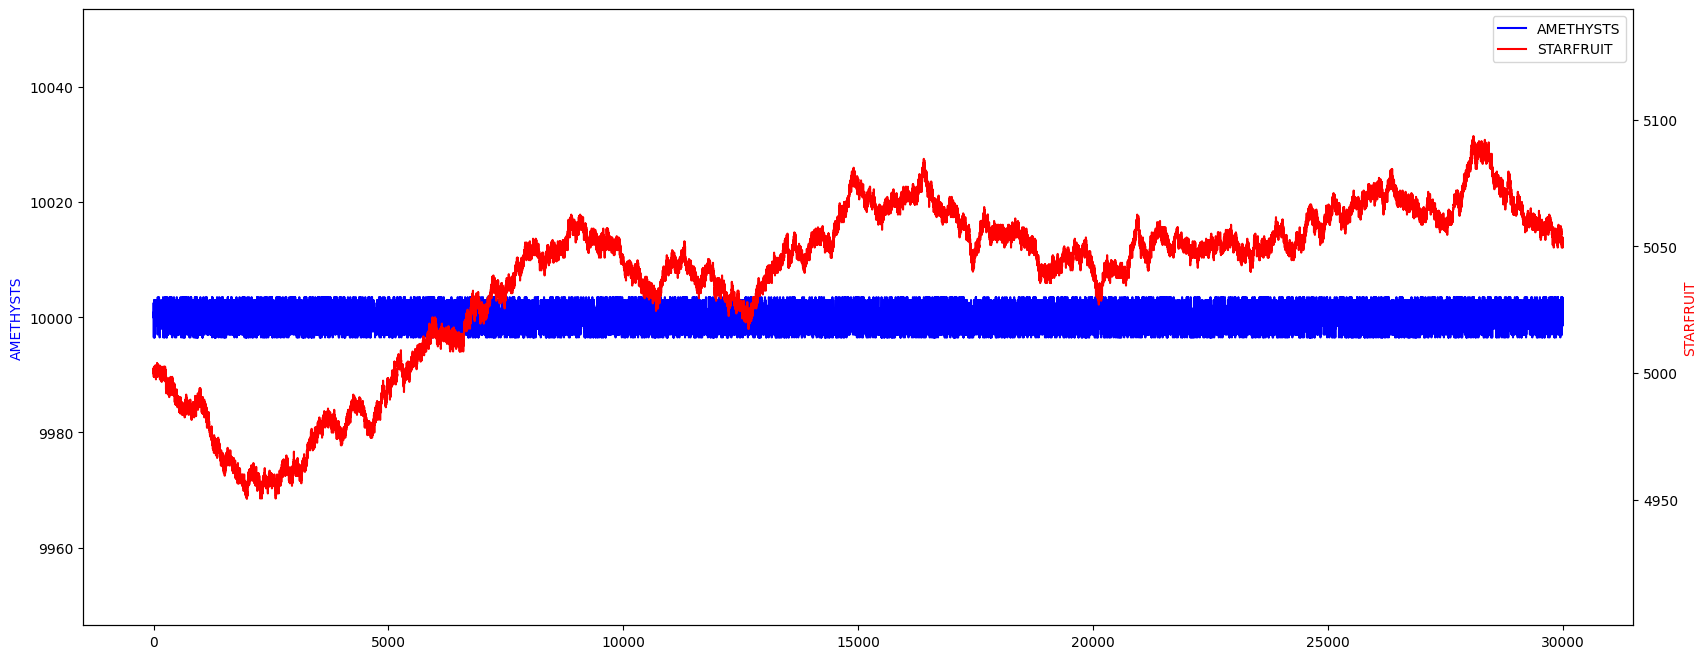

In [ ]:
# Pipeline for Pairs Trading
#print(os.getcwd())
from statsmodels.tsa.stattools import coint
import pandas as pd
import numpy as np

product1, product2 = 'AMETHYSTS', 'STARFRUIT'
p1_df = df[df['product'] == product1].reset_index(drop=True)
p2_df = df[df['product'] == product2].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot both mid prices on the same plot
ax1.plot(p1_df['mid_price'], label=product1, color='blue')
ax1.set_ylabel(product1, color='blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

ax2.plot(p2_df['mid_price'], label=product2, color='red')
ax2.set_ylabel(product2, color='red')

# Adjust y-axis limits for each product
min1, max1 = p1_df['mid_price'].min(), p1_df['mid_price'].max()
min2, max2 = p2_df['mid_price'].min(), p2_df['mid_price'].max()
ax1.set_ylim(min1 - 50, max1 + 50)  # Set limits for product1
ax2.set_ylim(min2 - 50, max2 + 50)    # Set limits for product2

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.show()


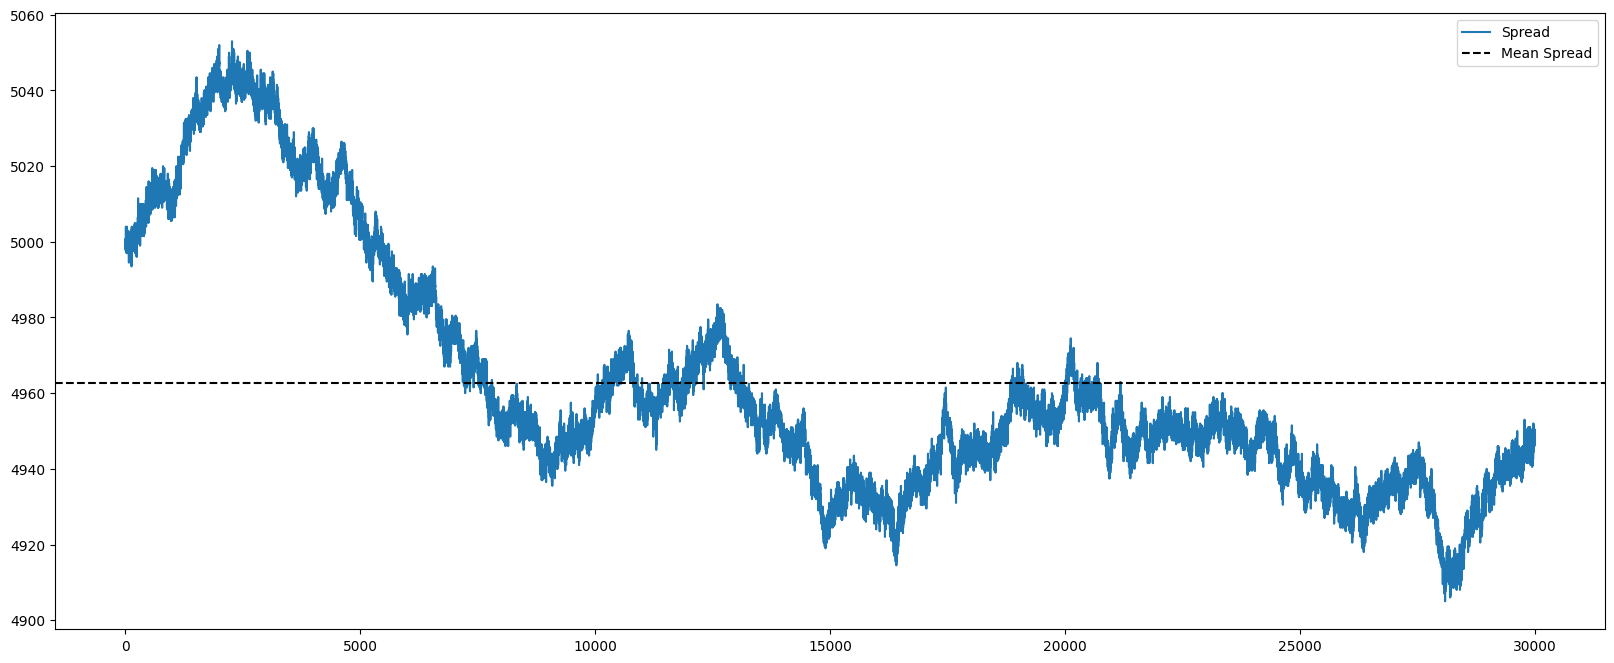

Cointegration Test P-Value: 0.000000
Standard Deviation of Spread: 32.32967868935901
ADF P-Value: 0.601950
Regression Formula:
const        3879.940537
mid_price       0.115749
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8627
Date:                Thu, 11 Apr 2024   Prob (F-statistic):              0.353
Time:                        22:49:24   Log-Likelihood:            -1.4682e+05
No. Observations:               30000   AIC:                         2.936e+05
Df Residuals:                   29998   BIC:                         2.937e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

In [ ]:
# Plot the spread
fig, ax = plt.subplots(figsize=(20, 8))
spread = p1_df['mid_price'] - p2_df['mid_price']
plt.plot(spread, label='Spread')
plt.axhline(spread.mean(), color='black', linestyle='--', label='Mean Spread')
plt.legend()
plt.show()

print('Cointegration Test P-Value: %f' % coint(p1_df['mid_price'], p2_df['mid_price'])[1])
print(f"Standard Deviation of Spread: {spread.std()}")

# ADF Fuller on Stationarity of Spread Time Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(spread)
print('ADF P-Value: %f' % result[1])


# OLS Regression on the 2 Products
import statsmodels.api as sm

X = p1_df['mid_price']
y = p2_df['mid_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

# Print out the formula
print("Regression Formula:")
print(model.params)
print(model.summary())

In [ ]:
#Load from Backtest Mid_prices
# p1 = "AMETHYSTS"
# p2 = "STARFRUIT"

# p1_df = pd.read_csv(f"{p1}_round_1_day_-2.csv")
# p2_df = pd.read_csv(f"{p2}_round_1_day_-2.csv")

# p1_df['timestamp'] = (p1_df.index * 100)
# p1_df.rename(columns={p1: 'mid_price'}, inplace=True)

# p2_df['timestamp'] = (p2_df.index * 100)
# p2_df.rename(columns={p2: 'mid_price'}, inplace=True)


In [17]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}

p2_df = df
for n in range(1, 20):
    X = pd.DataFrame(p2_df['HUMIDITY'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['HUMIDITY'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['HUMIDITY']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=True)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")





n=1, mse=0.00010139695976587957 mape=0.011563684275170768 rsquared=0.999990763091935
Model Alpha: 0.0969146970619586 Model L1 Ratio: 1.0
n=1, BIC=-55179.30148509901
n=1, mse=3.195679406244547e-05 mape=0.00684384747620554 rsquared=1.0
Model Intercept: 0.0017735270484919852
n=1, BIC=-241868.26581452868


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=0.00010141130115944082 mape=0.011564951533927507 rsquared=0.9999907632996691
Model Alpha: 0.09691694584011226 Model L1 Ratio: 1.0
n=2, BIC=-55160.55710094891
n=2, mse=3.1227146341248294e-05 mape=0.006764795825191613 rsquared=1.0
Model Intercept: 0.0018227945928170897
n=2, BIC=-241858.20309607126


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=3, mse=0.00010140916800897878 mape=0.011564820045384323 rsquared=0.9999907634939598
Model Alpha: 0.09692089276357574 Model L1 Ratio: 1.0
n=3, BIC=-55151.983795382876
n=3, mse=3.052174118637458e-05 mape=0.006687598602351624 rsquared=1.0
Model Intercept: 0.0018702437366866498
n=3, BIC=-241837.0542419178


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=4, mse=0.00010140701891503315 mape=0.011564687569232488 rsquared=0.9999907636897026
Model Alpha: 0.09692484051635952 Model L1 Ratio: 1.0
n=4, BIC=-55143.41143580774
n=4, mse=2.984087963207011e-05 mape=0.00661221355806911 rsquared=1.0
Model Intercept: 0.0019173959737913693
n=4, BIC=-241815.90498823114


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=5, mse=0.00010140485387731633 mape=0.011564554105382045 rsquared=0.9999907638868977
Model Alpha: 0.09692878909967101 Model L1 Ratio: 1.0
n=5, BIC=-55134.84002230057
n=5, mse=2.9183503349457267e-05 mape=0.006538582320921744 rsquared=1.0
Model Intercept: 0.0019642569573771213
n=5, BIC=-241794.75534924693


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=6, mse=0.0001014026728967734 mape=0.011564419653819293 rsquared=0.9999907640855448
Model Alpha: 0.09693273851469725 Model L1 Ratio: 1.0
n=6, BIC=-55126.269554866
n=6, mse=2.854848994404654e-05 mape=0.0064666347345979395 rsquared=1.0
Model Intercept: 0.002010840936863545
n=6, BIC=-241773.60534664665


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=7, mse=0.00010141698196143113 mape=0.01156568895851796 rsquared=0.9999907642971128
Model Alpha: 0.09693498710000166 Model L1 Ratio: 1.0
n=7, BIC=-55107.52832870909
n=7, mse=2.7936137850007398e-05 mape=0.006396335670102955 rsquared=1.0
Model Intercept: 0.002058567139147982
n=7, BIC=-241763.54025994515


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=8, mse=0.00010141476898559402 mape=0.01156555255044984 rsquared=0.999990764498641
Model Alpha: 0.09693893798436563 Model L1 Ratio: 1.0
n=8, BIC=-55098.95988363848
n=8, mse=2.734295676828192e-05 mape=0.006327608540022683 rsquared=1.0
Model Intercept: 0.0021046031206967825
n=8, BIC=-241742.38949217866


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=9, mse=0.00010141254006704283 mape=0.011565415154646673 rsquared=0.9999907647016211
Model Alpha: 0.09694288970372551 Model L1 Ratio: 1.0
n=9, BIC=-55090.392384506275
n=9, mse=2.6769319212312406e-05 mape=0.006260407738163987 rsquared=1.0
Model Intercept: 0.0021503880723276053
n=9, BIC=-241721.23840780286


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=10, mse=0.00010141029520592541 mape=0.011565276771042837 rsquared=0.9999907649060531
Model Alpha: 0.09694684225918557 Model L1 Ratio: 1.0
n=10, BIC=-55081.825831366026
n=10, mse=2.6214465069055386e-05 mape=0.006194694873827289 rsquared=1.0
Model Intercept: 0.0021959232362923397
n=10, BIC=-241700.08701569127


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=11, mse=0.00010140803440316577 mape=0.011565137399620552 rsquared=0.9999907651119367
Model Alpha: 0.09695079565182955 Model L1 Ratio: 1.0
n=11, BIC=-55073.26022422586
n=11, mse=2.5677560429406328e-05 mape=0.006130417616945428 rsquared=1.0
Model Intercept: 0.0022412189440981223
n=11, BIC=-241678.9353320755


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=12, mse=0.00010142229280058389 mape=0.01156640656820072 rsquared=0.9999907653289966
Model Alpha: 0.09695304405991992 Model L1 Ratio: 1.0
n=12, BIC=-55054.5232336044
n=12, mse=2.515894922942048e-05 mape=0.006067540336171193 rsquared=1.0
Model Intercept: 0.0022876229346771026
n=12, BIC=-241668.8682660862


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=13, mse=0.00010142000705848586 mape=0.011566265676245994 rsquared=0.9999907655371172
Model Alpha: 0.09695699893098018 Model L1 Ratio: 1.0
n=13, BIC=-55045.95922997789
n=13, mse=2.4655696272117795e-05 mape=0.006005999412248659 rsquared=1.0
Model Intercept: 0.0023324474594948325
n=13, BIC=-241647.71595582776


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=14, mse=0.00010141770114576626 mape=0.011566123535542427 rsquared=0.9999907657470745
Model Alpha: 0.09696095464135343 Model L1 Ratio: 1.0
n=14, BIC=-55037.39642231965
n=14, mse=2.4168214085403576e-05 mape=0.005945760804578105 rsquared=1.0
Model Intercept: 0.002377055397318438
n=14, BIC=-241626.5633941849


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=15, mse=0.00010141538070440537 mape=0.011565980494097194 rsquared=0.9999907659583546
Model Alpha: 0.09696491119228115 Model L1 Ratio: 1.0
n=15, BIC=-55028.834477028104
n=15, mse=2.369591617226028e-05 mape=0.005886792146131738 rsquared=1.0
Model Intercept: 0.0024214484759666035
n=15, BIC=-241605.41058859148


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=16, mse=0.00010141304714614089 mape=0.011565836638945561 rsquared=0.9999907661708289
Model Alpha: 0.09696886858438722 Model L1 Ratio: 1.0
n=16, BIC=-55020.2733106662
n=16, mse=2.323817571156113e-05 mape=0.005829053802727526 rsquared=1.0
Model Intercept: 0.00246563414206058
n=16, BIC=-241584.2575512323


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=17, mse=0.00010142725481113164 mape=0.011567105679806632 rsquared=0.999990766393374
Model Alpha: 0.09697111682713352 Model L1 Ratio: 1.0
n=17, BIC=-55001.540552075516
n=17, mse=2.279544727266519e-05 mape=0.0057725193474265375 rsquared=1.0
Model Intercept: 0.002510886654647493
n=17, BIC=-241574.18881354775


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=18, mse=0.00010142488925883153 mape=0.011566959930132532 rsquared=0.9999907666087262
Model Alpha: 0.09697507570569305 Model L1 Ratio: 1.0
n=18, BIC=-54992.98140501165
n=18, mse=2.236505999485351e-05 mape=0.005717134647548116 rsquared=1.0
Model Intercept: 0.0025546637052644844
n=18, BIC=-241553.03526378225


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=19, mse=0.0001014225077724458 mape=0.011566813202531626 rsquared=0.999990766825529
Model Alpha: 0.09697903542785055 Model L1 Ratio: 1.0
n=19, BIC=-54984.423203374645
n=19, mse=2.194762845743943e-05 mape=0.005662880410976138 rsquared=1.0
Model Intercept: 0.0025982437268508296
n=19, BIC=-241531.8815088336
     n       mse      mape  rsquared           bic  \
16  17  0.000101  0.011567  0.999991 -55001.540552   
17  18  0.000101  0.011567  0.999991 -54992.981405   
18  19  0.000101  0.011567  0.999991 -54984.423203   
11  12  0.000101  0.011566  0.999991 -55054.523234   
12  13  0.000101  0.011566  0.999991 -55045.959230   
13  14  0.000101  0.011566  0.999991 -55037.396422   
14  15  0.000101  0.011566  0.999991 -55028.834477   
6    7  0.000101  0.011566  0.999991 -55107.528329   
15  16  0.000101  0.011566  0.999991 -55020.273311   
7    8  0.000101  0.011566  0.999991 -55098.959884   

                                         coefficients  intercept  \
16  [0.0, 0.9989748587411764

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


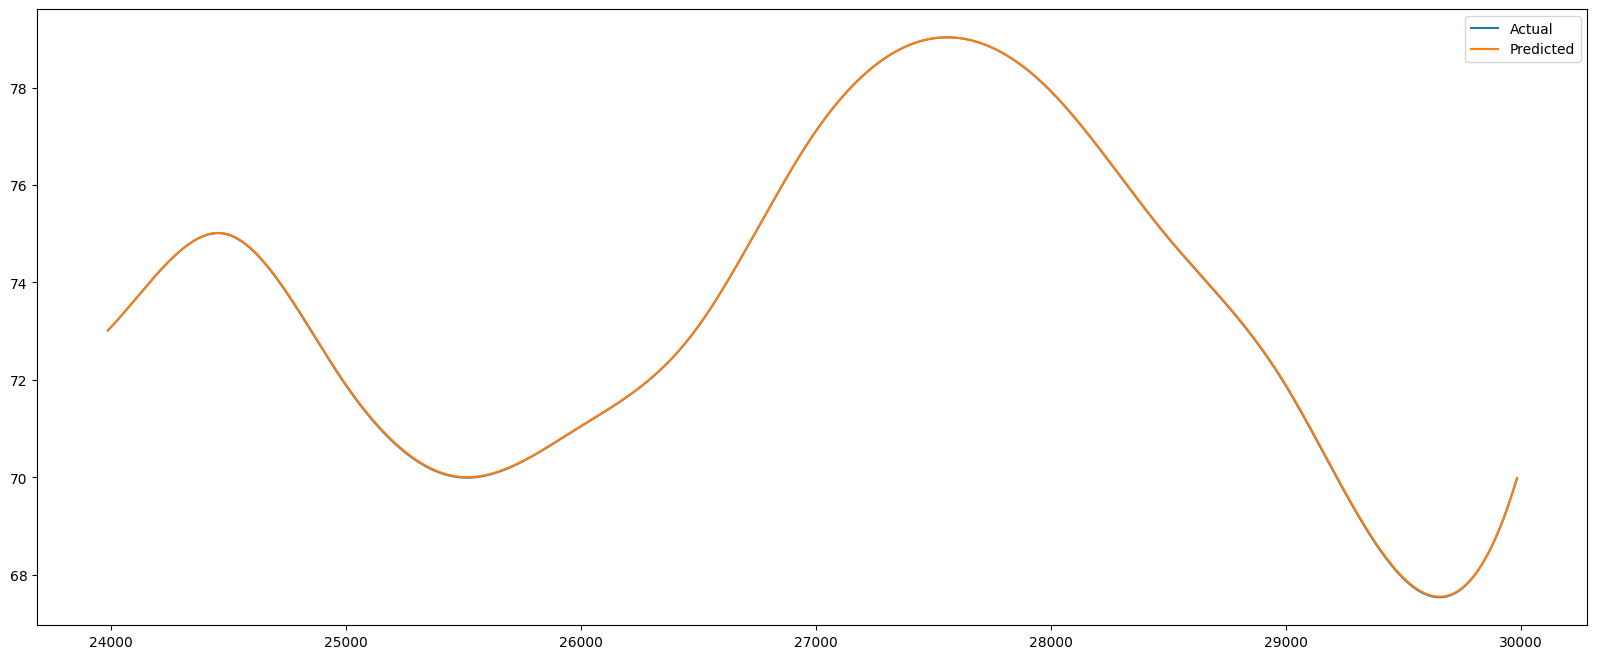

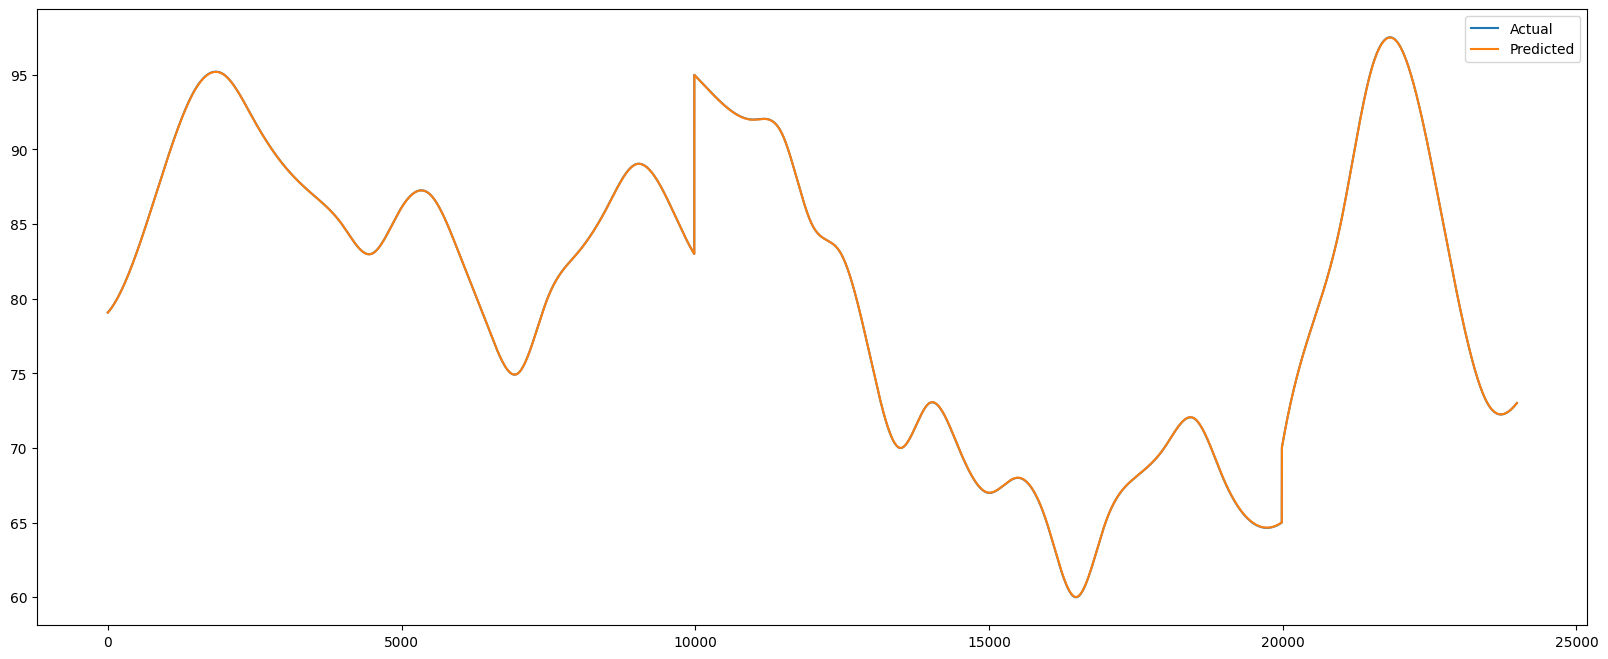

Percentage of times the predicted change same direction as the actual change: 0.4739036184759046
Percentage of times the predicted change same direction as the actual change in Train: 0.5478572619643155
{1: 0.47425429095150806, 2: 0.4741666666666667, 3: 0.4741666666666667, 4: 0.4741666666666667, 5: 0.4741666666666667, 6: 0.4741666666666667, 7: 0.4740790131688615, 8: 0.4740790131688615, 9: 0.4740790131688615, 10: 0.4740790131688615, 11: 0.4740790131688615, 12: 0.4739913304434812, 13: 0.4739913304434812, 14: 0.4739913304434812, 15: 0.4739913304434812, 16: 0.4739913304434812, 17: 0.4739036184759046, 18: 0.4739036184759046, 19: 0.4739036184759046}
n=17, Coefficients: [0.0, 0.9989748587411764, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Intercept: 0.0822587125718428
[17, [0.9989748587411764], 0.0822587125718428]
MSE: 0.00010142725481113164, MAPE: 0.011567105679806632, R-Squared: 0.999990766393374, BIC: -55001.540552075516

n=18, Coefficients: [0.0, 0.998

In [18]:
# Plot the best results
Y_PRED = best_results['Y_PRED'].iloc[0]
Y_TEST = best_results['Y_TEST'].iloc[0]
Y_TRAIN = best_results['Y_TRAIN'].iloc[0]
Y_TRAIN_PRED = best_results['Y_TRAIN_PRED'].iloc[0]
n = best_results['n'].iloc[0]

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TEST, label='Actual')
plt.plot(Y_PRED, label='Predicted')
plt.legend()
plt.show()




fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TRAIN, label='Actual')
plt.plot(Y_TRAIN_PRED, label='Predicted')
plt.legend()
plt.show()


# Count the number of times the predicted change same direction as the actual change
count = 0
for i in range(1, len(Y_TEST)):
    if (Y_TEST.iloc[i] - Y_TEST.iloc[i-1]) * (Y_PRED.iloc[i] - Y_TEST.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change: {count/len(Y_TEST)}")
count = 0
for i in range(1, len(Y_TRAIN)):
    if (Y_TRAIN.iloc[i] - Y_TRAIN.iloc[i-1]) * (Y_TRAIN_PRED[i] - Y_TRAIN.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change in Train: {count/len(Y_TRAIN)}")
print(directional_accuracy)




top_results = best_results.head(10).iloc[:, :7]

# Iterate through and print out n, coefficients, intercept
for i in range(len(top_results)):
    print(f"n={top_results['n'].iloc[i]}, Coefficients: {list(top_results['coefficients'].iloc[i])}, Intercept: {top_results['intercept'].iloc[i]}")
    print(f"[{top_results['n'].iloc[i]}, {[i for i in list(top_results['coefficients'].iloc[i]) if i != 0.0]}, {top_results['intercept'].iloc[i]}]")
    print(f"MSE: {top_results['mse'].iloc[i]}, MAPE: {top_results['mape'].iloc[i]}, R-Squared: {top_results['rsquared'].iloc[i]}, BIC: {top_results['bic'].iloc[i]}")
    print()

In [ ]:
# Using Linear Regression for VWAP

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}
for n in range(1, 20):
    X = pd.DataFrame(p2_df['vwap'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['vwap'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['vwap']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=True)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")





n=1, mse=0.3691296171354885 mape=0.008021128314935795 rsquared=0.9956848039296773
Model Alpha: 1.0335521866840638 Model L1 Ratio: 1.0
n=1, BIC=-5970.945069279091
n=1, mse=0.3679176972329342 mape=0.007911231000314364 rsquared=1.0
Model Intercept: 0.9124612446081954
n=1, BIC=-233255.98396152348


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=0.36269551577045295 mape=0.0079580130872803 rsquared=0.9957600198095136
Model Alpha: 1.0439969606458461 Model L1 Ratio: 0.99
n=2, BIC=-6067.750547924926
n=2, mse=0.33922360101811966 mape=0.008068909782682293 rsquared=1.0
Model Intercept: 0.6691454863852597
n=2, BIC=-233919.06320518735


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=3, mse=0.3626954235061661 mape=0.007958014212734532 rsquared=0.9957600208881008
Model Alpha: 1.0440011950911918 Model L1 Ratio: 0.99
n=3, BIC=-6059.052559486712
n=3, mse=0.337161068140517 mape=0.008082203498376746 rsquared=1.0
Model Intercept: 0.6317937701387564
n=3, BIC=-233934.529223156


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=4, mse=0.3594839963318091 mape=0.007942244236610257 rsquared=0.9957975813833421
Model Alpha: 1.0439901977543455 Model L1 Ratio: 0.99
n=4, BIC=-6102.69323775535
n=4, mse=0.33716722806143984 mape=0.008094756244261073 rsquared=1.0
Model Intercept: 0.6176116370770615
n=4, BIC=-233933.51952234295


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=5, mse=0.35946612650107657 mape=0.007942185567399694 rsquared=0.9957977902841836
Model Alpha: 1.0439922478867547 Model L1 Ratio: 0.99
n=5, BIC=-6094.2921054086
n=5, mse=0.337124397911538 mape=0.008095847397282007 rsquared=1.0
Model Intercept: 0.6197495366755987
n=5, BIC=-233914.00113407904


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=6, mse=0.3595185512706959 mape=0.007942351218142366 rsquared=0.9957971774312331
Model Alpha: 1.0439943276420607 Model L1 Ratio: 0.99
n=6, BIC=-6084.717923138698
n=6, mse=0.33713814028654754 mape=0.008096677415439051 rsquared=1.0
Model Intercept: 0.6206900004773033
n=6, BIC=-233894.0963809341


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=7, mse=0.35951819326595275 mape=0.007942345163376633 rsquared=0.995797181616359
Model Alpha: 1.043997703579007 Model L1 Ratio: 0.99
n=7, BIC=-6076.024548814308
n=7, mse=0.33721873650720924 mape=0.008099759060028841 rsquared=1.0
Model Intercept: 0.6132538876575889
n=7, BIC=-233874.00385442667


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=8, mse=0.3595178296103591 mape=0.00794233939965514 rsquared=0.9957971858675442
Model Alpha: 1.0440010676926388 Model L1 Ratio: 0.99
n=8, BIC=-6067.3312687873
n=8, mse=0.33725651558054853 mape=0.00809995375044428 rsquared=1.0
Model Intercept: 0.6113513980890275
n=8, BIC=-233852.90427774456


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=9, mse=0.3594400739350211 mape=0.007940867253368926 rsquared=0.9957979683534194
Model Alpha: 1.0439896433728217 Model L1 Ratio: 0.99
n=9, BIC=-6058.907803300519
n=9, mse=0.3370975177522746 mape=0.008097416987005928 rsquared=1.0
Model Intercept: 0.6092550290268264
n=9, BIC=-233842.58856348242


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=10, mse=0.3594396714893962 mape=0.007940861041612306 rsquared=0.995797973058207
Model Alpha: 1.043995540985983 Model L1 Ratio: 0.99
n=10, BIC=-6050.21533758141
n=10, mse=0.3370977114789212 mape=0.008097636682119153 rsquared=1.0
Model Intercept: 0.6060116042353059
n=10, BIC=-233821.5663840728


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=11, mse=0.3594576254690622 mape=0.007940929264306059 rsquared=0.9957977631673346
Model Alpha: 1.0440005058161619 Model L1 Ratio: 0.99
n=11, BIC=-6041.21656413707
n=11, mse=0.3372357998871012 mape=0.008099602666157318 rsquared=1.0
Model Intercept: 0.614406036011971
n=11, BIC=-233801.36273416693


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=12, mse=0.35945695020446594 mape=0.00794090870395011 rsquared=0.9957977710615106
Model Alpha: 1.0440056381281582 Model L1 Ratio: 0.99
n=12, BIC=-6032.528650422583
n=12, mse=0.3372368700834501 mape=0.008099585107343165 rsquared=1.0
Model Intercept: 0.6100944968909219
n=12, BIC=-233780.6920222971


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=13, mse=0.3594567179493292 mape=0.007940903501705577 rsquared=0.9957977737766875
Model Alpha: 1.044011684897511 Model L1 Ratio: 0.99
n=13, BIC=-6023.83334453921
n=13, mse=0.33719829050044237 mape=0.008099112207167932 rsquared=1.0
Model Intercept: 0.6109128244061139
n=13, BIC=-233759.5599892798


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=14, mse=0.35951628557499127 mape=0.007942191748870939 rsquared=0.9957969558652849
Model Alpha: 1.0440004761753596 Model L1 Ratio: 0.99
n=14, BIC=-6013.119621196376
n=14, mse=0.3372531184746207 mape=0.008099957149444312 rsquared=1.0
Model Intercept: 0.611616036912892
n=14, BIC=-233749.41294559572


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=15, mse=0.35953384521251863 mape=0.007942257999348687 rsquared=0.9957967505785303
Model Alpha: 1.044005120978777 Model L1 Ratio: 0.99
n=15, BIC=-6004.127705864998
n=15, mse=0.3372998125579766 mape=0.008100969073613126 rsquared=1.0
Model Intercept: 0.6154332560707729
n=15, BIC=-233729.10848152332


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=16, mse=0.3595171864967395 mape=0.007942198653627422 rsquared=0.9957969453327611
Model Alpha: 1.0440085517112645 Model L1 Ratio: 0.99
n=16, BIC=-5995.706563921625
n=16, mse=0.33726030480906 mape=0.00810001642699684 rsquared=1.0
Model Intercept: 0.6200827051151805
n=16, BIC=-233708.24822384256


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=17, mse=0.3595166755202077 mape=0.007942192206053304 rsquared=0.9957969513065014
Model Alpha: 1.0440119342494187 Model L1 Ratio: 0.99
n=17, BIC=-5987.0160727531165
n=17, mse=0.33724705191849635 mape=0.008100008351029291 rsquared=1.0
Model Intercept: 0.6218427372676262
n=17, BIC=-233687.1228080278


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=18, mse=0.35955114790544873 mape=0.007942301458629402 rsquared=0.9957965482956714
Model Alpha: 1.0440166335057752 Model L1 Ratio: 0.99
n=18, BIC=-5977.742061202778
n=18, mse=0.33722832647825746 mape=0.008099622341666878 rsquared=1.0
Model Intercept: 0.6174952586843574
n=18, BIC=-233667.03730618386


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=19, mse=0.3596298992491475 mape=0.007943609972247755 rsquared=0.995795505730061
Model Alpha: 1.0440043300710014 Model L1 Ratio: 0.99
n=19, BIC=-5966.710175260587
n=19, mse=0.3372643524398243 mape=0.00810039790971826 rsquared=1.0
Model Intercept: 0.6218886966235004
n=19, BIC=-233657.49010308413
     n       mse      mape  rsquared          bic  \
5    6  0.359519  0.007942  0.995797 -6084.717923   
6    7  0.359518  0.007942  0.995797 -6076.024549   
1    2  0.362696  0.007958  0.995760 -6067.750548   
2    3  0.362695  0.007958  0.995760 -6059.052559   
7    8  0.359518  0.007942  0.995797 -6067.331269   
3    4  0.359484  0.007942  0.995798 -6102.693238   
4    5  0.359466  0.007942  0.995798 -6094.292105   
0    1  0.369130  0.008021  0.995685 -5970.945069   
14  15  0.359534  0.007942  0.995797 -6004.127706   
18  19  0.359630  0.007944  0.995796 -5966.710175   

                                         coefficients  intercept  \
5   [0.0, 0.9487079673973507, 0.04882953537331608

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


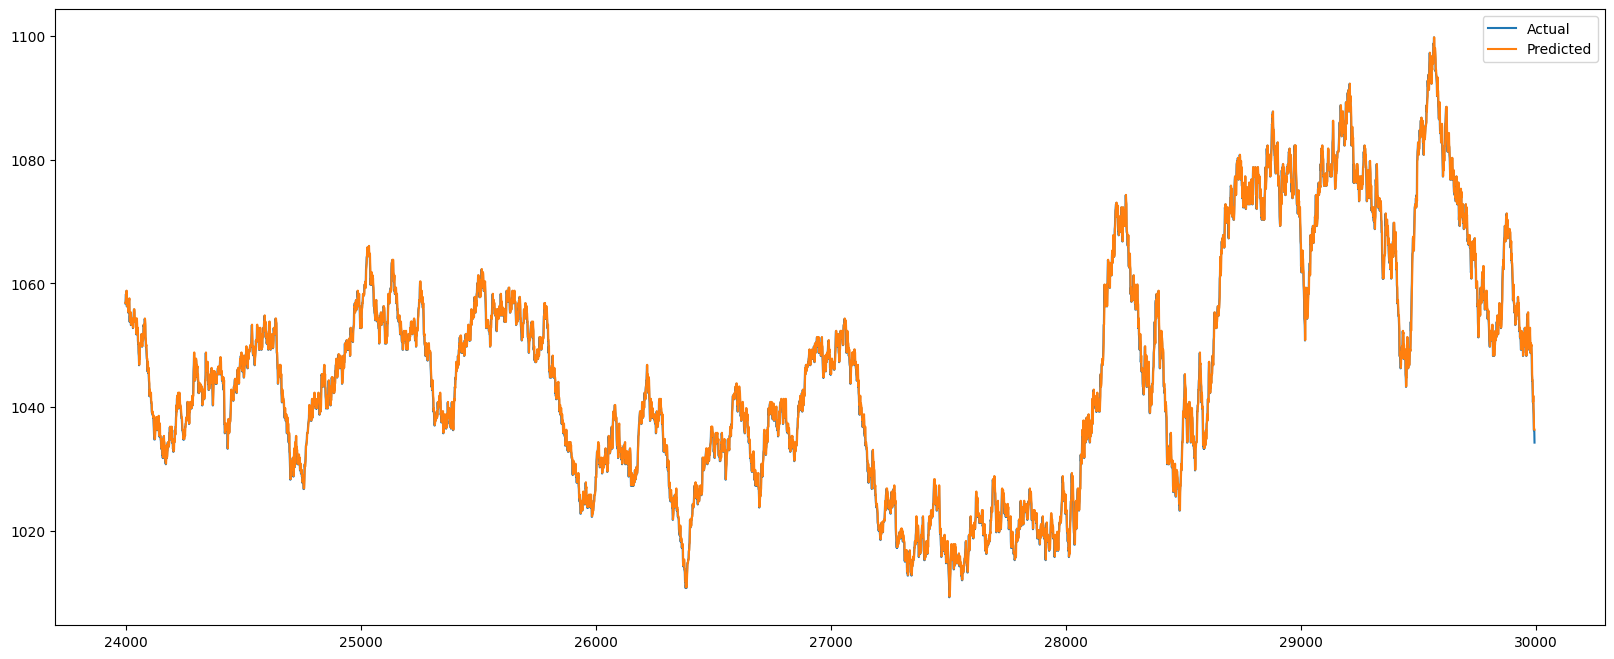

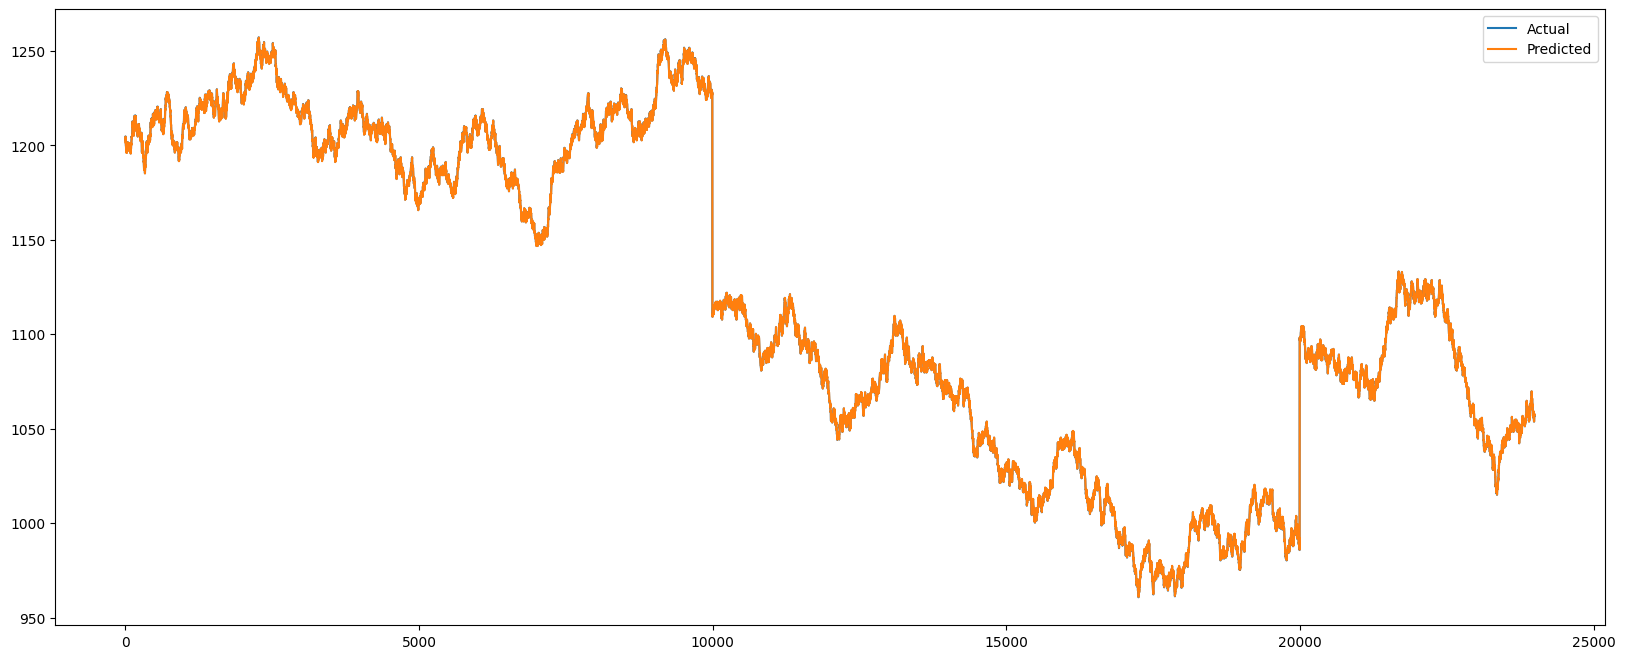

Percentage of times the predicted change same direction as the actual change: 0.42157026171028505
Percentage of times the predicted change same direction as the actual change in Train: 0.4022337056176029
{}
n=7, Coefficients: [0.0, 0.9988442336404714, 0.0, 3.4701001381605283e-06, 0.0, 1.585303603986671e-06, 2.2279276972481416e-06, 1.1108665231066084e-06], Intercept: 1.2767354851785058
[7, [0.9988442336404714, 3.4701001381605283e-06, 1.585303603986671e-06, 2.2279276972481416e-06, 1.1108665231066084e-06], 1.2767354851785058]
MSE: 1.360577576805386, MAPE: 0.08507189183614866, R-Squared: 0.9960662071631672, BIC: 1908.0433176991983

n=8, Coefficients: [0.0, 0.9988422910195384, 0.0, 3.469316021427119e-06, 0.0, 1.5844475405661815e-06, 2.227559547537939e-06, 1.1325506806611806e-06, 2.8888717101997876e-06], Intercept: 1.275609514719008
[8, [0.9988422910195384, 3.469316021427119e-06, 1.5844475405661815e-06, 2.227559547537939e-06, 1.1325506806611806e-06, 2.8888717101997876e-06], 1.275609514719008

In [ ]:
# Plot the best results
Y_PRED = best_results['Y_PRED'].iloc[0]
Y_TEST = best_results['Y_TEST'].iloc[0]
Y_TRAIN = best_results['Y_TRAIN'].iloc[0]
Y_TRAIN_PRED = best_results['Y_TRAIN_PRED'].iloc[0]
n = best_results['n'].iloc[0]

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TEST, label='Actual')
plt.plot(Y_PRED, label='Predicted')
plt.legend()
plt.show()




fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TRAIN, label='Actual')
plt.plot(Y_TRAIN_PRED, label='Predicted')
plt.legend()
plt.show()


# Count the number of times the predicted change same direction as the actual change
count = 0
for i in range(1, len(Y_TEST)):
    if (Y_TEST.iloc[i] - Y_TEST.iloc[i-1]) * (Y_PRED.iloc[i] - Y_TEST.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change: {count/len(Y_TEST)}")
count = 0
for i in range(1, len(Y_TRAIN)):
    if (Y_TRAIN.iloc[i] - Y_TRAIN.iloc[i-1]) * (Y_TRAIN_PRED[i] - Y_TRAIN.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change in Train: {count/len(Y_TRAIN)}")
print(directional_accuracy)




top_results = best_results.head(10).iloc[:, :7]

# Iterate through and print out n, coefficients, intercept
for i in range(len(top_results)):
    print(f"n={top_results['n'].iloc[i]}, Coefficients: {list(top_results['coefficients'].iloc[i])}, Intercept: {top_results['intercept'].iloc[i]}")
    print(f"[{top_results['n'].iloc[i]}, {[i for i in list(top_results['coefficients'].iloc[i]) if i != 0.0]}, {top_results['intercept'].iloc[i]}]")
    print(f"MSE: {top_results['mse'].iloc[i]}, MAPE: {top_results['mape'].iloc[i]}, R-Squared: {top_results['rsquared'].iloc[i]}, BIC: {top_results['bic'].iloc[i]}")
    print()

In [ ]:
p2_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,vwap,best_bid,best_ask,mid_price_best,median_price,spread
0,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,4997.000000,5003.000000,26.0,26.0,5000.000000,4997.0,5003.0,5000.0,5000.0,6.000000
1,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,4997.677419,5004.000000,31.0,20.0,5000.156863,4997.0,5004.0,5000.5,4999.0,6.322581
2,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,4996.032258,5003.000000,31.0,31.0,4999.516129,4996.0,5003.0,4999.5,4997.0,6.967742
3,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,4996.000000,5003.000000,27.0,27.0,4999.500000,4996.0,5003.0,4999.5,4999.5,7.000000
4,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,4995.000000,5002.000000,20.0,20.0,4998.500000,4995.0,5002.0,4998.5,4998.5,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,5049.000000,5056.000000,28.0,28.0,5052.500000,5049.0,5056.0,5052.5,5052.5,7.000000
29996,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,5047.250000,5054.000000,36.0,29.0,5050.261538,5047.0,5054.0,5050.5,5048.0,6.750000
29997,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,5048.185185,5054.923077,27.0,26.0,5051.490566,5048.0,5055.0,5051.5,5053.5,6.737892
29998,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,5047.000000,5053.928571,27.0,28.0,5050.527273,5047.0,5054.0,5050.5,5052.0,6.928571
